<a href="https://colab.research.google.com/github/amandasgonsalves/C-studying/blob/main/kmeans_naoSupervisionada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.impute import SimpleImputer


# Montar o Google Drive
drive.mount('/content/drive')

# Montar o drive e carregar os dados
file_path = '/content/drive/MyDrive/sei_IA.xlsx'
planilha1 = 'Relacao_Alunos'
planilha2 = 'Historico'

relacao_alunos = pd.read_excel(file_path, skiprows=2, sheet_name=planilha1)
historico = pd.read_excel(file_path, skiprows=2, sheet_name=planilha2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ler os dados das planilhas
relacao_alunos = pd.read_excel(file_path, skiprows=2, sheet_name=planilha1)
planilha2 = 'Historico'
historico = pd.read_excel(file_path, skiprows=2, sheet_name=planilha2)

In [ ]:
# Selecionar variáveis relevantes
relacao_alunos = relacao_alunos[['id', 'Idade', 'Coeficiente', 'Nota Enem', 'Sexo',
                                 'Período Desistências','Escola Pública?',
                                 'Situação Atual do Aluno', 'Curso',
                                 'Tipo de Cota']]

historico = historico[['id', 'Nota']]

# Integrar os dados das duas abas
merged_df = pd.merge(relacao_alunos, historico, on='id', how='left')

# Verificar as colunas do DataFrame após o merge
print("Colunas no DataFrame após o merge:")
print(merged_df.columns)
print("Número de linhas após o merge:", merged_df.shape[0])

Colunas no DataFrame após o merge:
Index(['id', 'Idade', 'Coeficiente', 'Nota Enem', 'Sexo',
       'Período Desistências', 'Escola Pública?', 'Situação Atual do Aluno',
       'Curso', 'Tipo de Cota', 'Nota'],
      dtype='object')
Número de linhas após o merge: 57329


In [ ]:
merged_df.head(232)

,id,Idade,Coeficiente,Nota Enem,Sexo,Período Desistências,Escola Pública?,Situação Atual do Aluno,Curso,Tipo de Cota,Nota
0,+bwsow,37,0.0222,634.3,M,1.0,Escola Pública,Desistente,Ciência Da Computação,Cotista,0.0
1,+bwsow,37,0.0222,634.3,M,1.0,Escola Pública,Desistente,Ciência Da Computação,Cotista,0.0
2,+bwsow,37,0.0222,634.3,M,1.0,Escola Pública,Desistente,Ciência Da Computação,Cotista,0.0
3,+bwsow,37,0.0222,634.3,M,1.0,Escola Pública,Desistente,Ciência Da Computação,Cotista,1.0
4,+bwsow,37,0.0222,634.3,M,1.0,Escola Pública,Desistente,Ciência Da Computação,Cotista,0.0
...,...,...,...,...,...,...,...,...,...,...,...
227,u68+bz,45,0.4841,700.6,F,2.0,Escola Pública,Desistente,Ciência Da Computação,Cotista,3.1
228,u68+bz,45,0.4841,700.6,F,2.0,Escola Pública,Desistente,Ciência Da Computação,Cotista,0.0
229,u68+bz,45,0.4841,700.6,F,2.0,Escola Pública,Desistente,Ciência Da Computação,Cotista,8.7
230,u68+bz,45,0.4841,700.6,F,2.0,Escola Pública,Desistente,Ciência Da Computação,Cotista,9.7


In [ ]:
# One-Hot Encoding para variáveis categóricas
categorical_columns = ['Sexo']
merged_df = pd.get_dummies(merged_df, columns=categorical_columns, drop_first=True)

In [ ]:
# Ajustar valores conforme as especificações
if 'Período Desistências' in merged_df.columns:
    merged_df['Período Desistências'] = merged_df['Período Desistências'].apply(lambda x: 0 if pd.isnull(x) else (1 if x in [1, 2] else x))
else:
    print("A coluna 'Período Desistências' não está presente no DataFrame.")

In [ ]:
# Escola Pública? (Transformação solicitada)
if 'Escola Pública?' in merged_df.columns:
    # Mapear 'escola pública' para 0 e 'escola privada' para 1
    merged_df['Escola_Publica_new'] = merged_df['Escola Pública?'].apply(lambda x: 0 if x == 'Escola Pública' else 1)
    # Remover a coluna original após a codificação
    merged_df.drop(columns=['Escola Pública?'], inplace=True)
else:
    print("A coluna 'Escola Pública?' não está presente no DataFrame.")

In [ ]:
# curso
if 'Curso' in merged_df.columns:

    merged_df['curso_new'] = merged_df['Curso'].apply(lambda x: 0 if x == 'Curso Superior De Tecnologia Em Análise E Desenvolvimento De Sistemas' else 1)
    # Remover a coluna original após a codificação
    merged_df.drop(columns=['Curso'], inplace=True)
else:
    print("A coluna 'Ciência da Computação' não está presente no DataFrame.")

In [ ]:
# curso
if 'Situação Atual do Aluno' in merged_df.columns:

    merged_df['Situação Atual do Aluno_new'] = merged_df['Situação Atual do Aluno'].apply(lambda x: 0 if x == 'Desistente' else 1)
    # Remover a coluna original após a codificação
    merged_df.drop(columns=['Situação Atual do Aluno'], inplace=True)
else:
    print("A coluna 'Ciência da Computação' não está presente no DataFrame.")

In [ ]:
if 'Tipo de Cota' in merged_df.columns:

    merged_df['Tipo de Cota_new'] = merged_df['Tipo de Cota'].apply(lambda x: 0 if x == 'Ampla concorrência' else 1)
    # Remover a coluna original após a codificação
    merged_df.drop(columns=['Tipo de Cota'], inplace=True)
else:
    print("A coluna 'Ciência da Computação' não está presente no DataFrame.")

In [ ]:
merged_df.head(50)

,id,Idade,Coeficiente,Nota Enem,Período Desistências,Nota,Sexo_M,Escola_Publica_new,curso_new,Situação Atual do Aluno_new,Tipo de Cota_new
0,+bwsow,37,0.0222,634.3,1,0.0,True,0,1,0,1
1,+bwsow,37,0.0222,634.3,1,0.0,True,0,1,0,1
2,+bwsow,37,0.0222,634.3,1,0.0,True,0,1,0,1
3,+bwsow,37,0.0222,634.3,1,1.0,True,0,1,0,1
4,+bwsow,37,0.0222,634.3,1,0.0,True,0,1,0,1
5,+bwsow,37,0.0222,634.3,1,0.0,True,0,1,0,1
6,f511wn,27,0.1852,623.2,1,1.4,True,1,1,0,0
7,f511wn,27,0.1852,623.2,1,2.1,True,1,1,0,0
8,f511wn,27,0.1852,623.2,1,1.3,True,1,1,0,0
9,f511wn,27,0.1852,623.2,1,1.0,True,1,1,0,0


In [ ]:
# Contar quantas linhas têm o valor 0 na coluna 'Período Desistências'
num_zero_desistencias = (merged_df['Período Desistências'] == 0).sum()

print("Número de linhas com 0 na coluna 'Período Desistências':", num_zero_desistencias)


Número de linhas com 0 na coluna 'Período Desistências': 14486


In [ ]:
# Remover duplicatas baseadas na coluna 'id'
merged_df = merged_df.drop_duplicates(subset='id')

In [ ]:
# Contar quantas linhas têm o valor 0 na coluna 'Período Desistências'
num_zero_desistencias = (merged_df['Período Desistências'] == 1).sum()

print("Número de linhas com 0 na coluna 'Período Desistências':", num_zero_desistencias)


Número de linhas com 0 na coluna 'Período Desistências': 1394


In [ ]:
merged_df.head(232)

,id,Idade,Coeficiente,Nota Enem,Período Desistências,Nota,Sexo_M,Escola_Publica_new,curso_new,Situação Atual do Aluno_new,Tipo de Cota_new
0,+bwsow,37,0.02220,634.3,1,0.0,True,0,1,0,1
6,f511wn,27,0.18520,623.2,1,1.4,True,1,1,0,0
12,gwhga8,39,0.16440,588.9,1,1.0,True,0,1,0,1
18,t5fkjk,30,0.00000,683.2,1,0.0,False,1,1,0,0
20,3ewz5c,27,0.25590,650.5,1,2.7,True,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
10133,st99wn,27,0.54540,530.6,0,7.0,True,0,1,1,1
10236,4xr1nz,26,0.51570,521.7,0,9.1,False,0,1,1,1
10339,oit99t,28,0.42430,629.8,0,6.1,True,0,1,1,1
10445,uby+9t,24,0.63556,582.8,1,9.3,True,1,1,0,0


In [ ]:
print("Número de linhas após o merge:", merged_df.shape[0])

Número de linhas após o merge: 1888


In [ ]:
# Limpeza de dados
def clean_column(column):
    merged_df[column] = pd.to_numeric(merged_df[column], errors='coerce')

numeric_columns = ['Coeficiente', 'Nota', 'Nota Enem', 'Situação Atual do Aluno_new', 'Período Desistências']
for column in numeric_columns:
    clean_column(column)

merged_df.head()

<ipython-input-708-3d486f89d13e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[column] = pd.to_numeric(merged_df[column], errors='coerce')


,id,Idade,Coeficiente,Nota Enem,Período Desistências,Nota,Sexo_M,Escola_Publica_new,curso_new,Situação Atual do Aluno_new,Tipo de Cota_new
0,+bwsow,37,0.0222,634.3,1,0.0,True,0,1,0,1
6,f511wn,27,0.1852,623.2,1,1.4,True,1,1,0,0
12,gwhga8,39,0.1644,588.9,1,1.0,True,0,1,0,1
18,t5fkjk,30,0.0000,683.2,1,0.0,False,1,1,0,0
20,3ewz5c,27,0.2559,650.5,1,2.7,True,0,1,0,1


In [ ]:
# Remover a coluna 'id'
merged_df = merged_df.drop(columns=['id'])

merged_df.head()

,Idade,Coeficiente,Nota Enem,Período Desistências,Nota,Sexo_M,Escola_Publica_new,curso_new,Situação Atual do Aluno_new,Tipo de Cota_new
0,37,0.0222,634.3,1,0.0,True,0,1,0,1
6,27,0.1852,623.2,1,1.4,True,1,1,0,0
12,39,0.1644,588.9,1,1.0,True,0,1,0,1
18,30,0.0000,683.2,1,0.0,False,1,1,0,0
20,27,0.2559,650.5,1,2.7,True,0,1,0,1


In [ ]:
# Normalizar os dados numéricos
scaler = MinMaxScaler()
merged_df[numeric_columns] = scaler.fit_transform(merged_df[numeric_columns])

merged_df.head()

,Idade,Coeficiente,Nota Enem,Período Desistências,Nota,Sexo_M,Escola_Publica_new,curso_new,Situação Atual do Aluno_new,Tipo de Cota_new
0,37,0.022699,0.578534,1.0,0.00,True,0,1,0.0,1
6,27,0.189366,0.549276,1.0,0.14,True,1,1,0.0,0
12,39,0.168098,0.458868,1.0,0.10,True,0,1,0.0,1
18,30,0.000000,0.707425,1.0,0.00,False,1,1,0.0,0
20,27,0.261656,0.621234,1.0,0.27,True,0,1,0.0,1


In [ ]:
# Preparação dos dados para o K-Means
df_numeric = merged_df[numeric_columns]
df_numeric = df_numeric.fillna(df_numeric.mean())

merged_df.head()

,Idade,Coeficiente,Nota Enem,Período Desistências,Nota,Sexo_M,Escola_Publica_new,curso_new,Situação Atual do Aluno_new,Tipo de Cota_new
0,37,0.022699,0.578534,1.0,0.00,True,0,1,0.0,1
6,27,0.189366,0.549276,1.0,0.14,True,1,1,0.0,0
12,39,0.168098,0.458868,1.0,0.10,True,0,1,0.0,1
18,30,0.000000,0.707425,1.0,0.00,False,1,1,0.0,0
20,27,0.261656,0.621234,1.0,0.27,True,0,1,0.0,1


In [ ]:
# Normalizar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
merged_df.head(232)


,Idade,Coeficiente,Nota Enem,Período Desistências,Nota,Sexo_M,Escola_Publica_new,curso_new,Situação Atual do Aluno_new,Tipo de Cota_new
0,37,0.022699,0.578534,1.0,0.00,True,0,1,0.0,1
6,27,0.189366,0.549276,1.0,0.14,True,1,1,0.0,0
12,39,0.168098,0.458868,1.0,0.10,True,0,1,0.0,1
18,30,0.000000,0.707425,1.0,0.00,False,1,1,0.0,0
20,27,0.261656,0.621234,1.0,0.27,True,0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...
10133,27,0.557669,0.305200,0.0,0.70,True,0,1,1.0,1
10236,26,0.527301,0.281742,0.0,0.91,False,0,1,1.0,1
10339,28,0.433845,0.566673,0.0,0.61,True,0,1,1.0,1
10445,24,0.649857,0.442790,1.0,0.93,True,1,1,0.0,0


In [ ]:
# Aplicar o K-Means
k = 2 # Número de clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

# Adicionar os resultados do K-Means ao DataFrame original
merged_df['Cluster'] = clusters

# Verificar o número de clusters atribuídos
print("Número de clusters:", len(set(clusters)))

# Adicionar os resultados do K-Means ao DataFrame original
merged_df['Cluster'] = clusters

# Verificar se o número de linhas no DataFrame corresponde ao esperado
print("Número de linhas no DataFrame final:", merged_df.shape[0])

# Exibir os centroides de todas as variáveis
centroides = scaler.inverse_transform(kmeans.cluster_centers_)
centroides_df = pd.DataFrame(centroides, columns=numeric_columns)

print("Centróides dos Clusters:")
print(centroides_df)

Número de clusters: 2
Número de linhas no DataFrame final: 1888
Centróides dos Clusters:
   Coeficiente      Nota  Nota Enem  Situação Atual do Aluno_new  \
0     0.610100  0.687698   0.547027                     0.989540   
1     0.304262  0.411334   0.522832                     0.012876   

   Período Desistências  
0              0.483264  
1              1.000000  


Variância explicada pelo PC1 e PC2: [0.46717279 0.22796375]


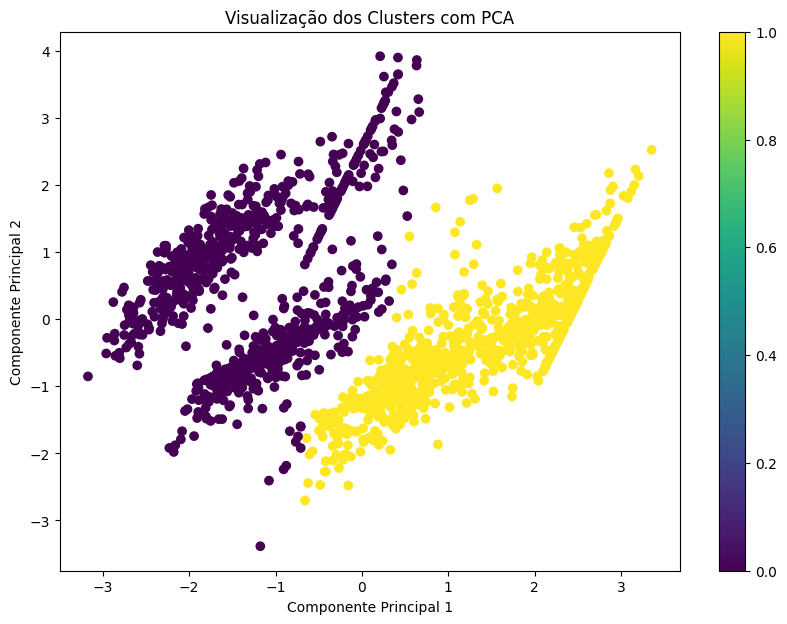

In [ ]:
# Visualizar os clusters com PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
# Verificar a variância explicada pelos dois componentes principais
print(f'Variância explicada pelo PC1 e PC2: {pca.explained_variance_ratio_}')
plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()

In [ ]:
# Calcular a pontuação de silhueta para avaliação de clusters
silhouette_avg = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 0.3541


In [ ]:
# Exibir a distribuição dos clusters
cluster_counts = merged_df['Cluster'].value_counts()
print("Distribuição dos clusters:")
print(cluster_counts)

Distribuição dos clusters:
Cluster
0    956
1    932
Name: count, dtype: int64


In [ ]:
# Agrupar por cluster e calcular as médias
cluster_means = merged_df.groupby('Cluster').mean()

# Ou salvar em Excel
cluster_means.to_excel('cluster_means.xlsx', index=True)

In [ ]:
file_path = '/content/cluster_means.xlsx'

relacao_alunos = pd.read_excel(file_path)
relacao_alunos.head()

,Cluster,Idade,Coeficiente,Nota Enem,Período Desistências,Nota,Sexo_M,Escola_Publica_new,curso_new,Situação Atual do Aluno_new,Tipo de Cota_new
0,0,25.699791,0.610100,0.550746,0.483264,0.697159,0.861925,0.423640,0.466527,0.989540,0.523013
1,1,27.550429,0.304262,0.519024,1.000000,0.407318,0.849785,0.435622,0.476395,0.012876,0.488197


In [ ]:
# Contar quantas linhas têm o valor 0 na coluna 'Período Desistências'
num_zero_desistencias = (merged_df['Período Desistências'] == 0).sum()

print("Número de linhas com 0 na coluna 'Período Desistências':", num_zero_desistencias)


Número de linhas com 0 na coluna 'Período Desistências': 494


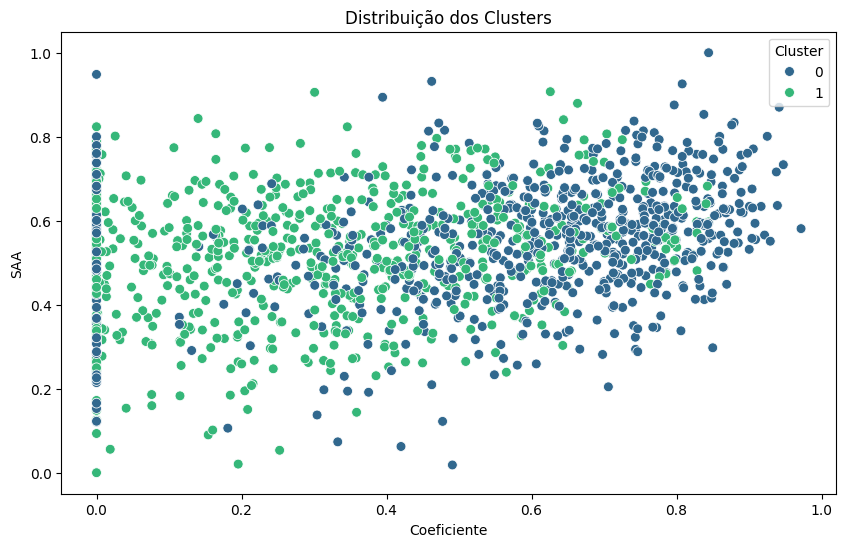

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot colorido por cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Coeficiente', y='Nota Enem', hue='Cluster', data=merged_df, palette='viridis', s=50)
plt.title('Distribuição dos Clusters')
plt.xlabel('Coeficiente')
plt.ylabel('SAA')
plt.legend(title='Cluster')
plt.show()
